<a href="https://colab.research.google.com/github/GeovaniRA/Proyectos_Escuela/blob/main/Practica_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anlisis de la base de datos

In [ ]:
import warnings
warnings.filterwarnings('once')

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Definir el directorio
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
# Carga de la base de datos
base = pd.read_csv('DiamondsPrices.csv')
print('La base de datos tiene {} filas y {} columnas\n'.format(base.shape[0],base.shape[1]))
base.head(5)

La base de datos tiene 53940 filas y 10 columnas



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Verificar existencia de datos faltantes
base.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
# Revisar los tipos de datos
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
# Obtener nombre de variables numericas y categoricas
var_cat = [llave for llave in dict(base.dtypes) if dict(base.dtypes)[llave] == 'O']
var_num = [llave for llave in dict(base.dtypes) if dict(base.dtypes)[llave] != 'O']

#Descripcion de variables categoricas
print('Las variables categoricas y sus valores unicos son: \n')
for i in var_cat:
  print('Variable:', i)
  print('Valores unicos: ', [x for x in base[i].unique()],'\n')

Las variables categoricas y sus valores unicos son: 

Variable: cut
Valores unicos:  ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'] 

Variable: color
Valores unicos:  ['E', 'I', 'J', 'H', 'F', 'G', 'D'] 

Variable: clarity
Valores unicos:  ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'] 



In [ ]:
# Obtener estadisticas descriptivas de variables numericas
base.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


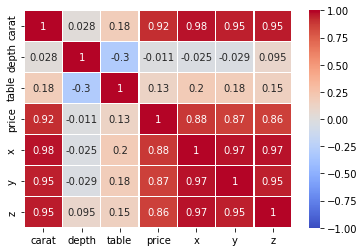

In [ ]:
sns.heatmap(base.corr(), annot = True, linewidths= 0.5, 
            cmap=sns.color_palette("coolwarm", as_cmap=True),
            vmin=-1, vmax=1)

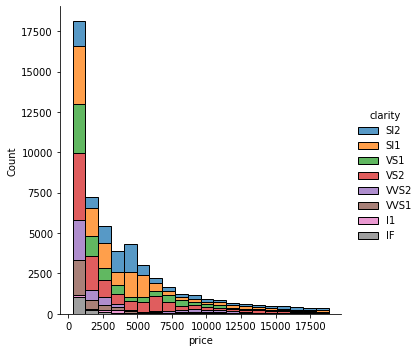

In [ ]:
# Distribucion del precio agrupado por clarity
print(sns.displot(base, x = 'price' , bins = 20, kde = False, kind = 'hist', 
            hue = 'clarity', multiple = 'stack'))

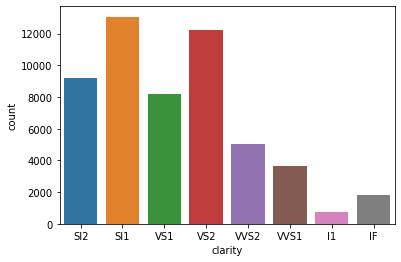

In [ ]:
# Proporciones de la clase clarity
sns.countplot(data = base, x = 'clarity')

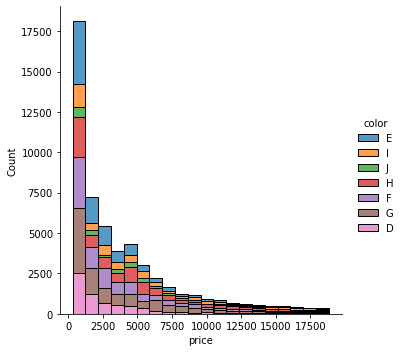

In [ ]:
# Distribucion del precio agrupado por color
sns.displot(base, x = 'price' , bins = 20, kde = False, kind = 'hist', 
            hue = 'color', multiple = 'stack')

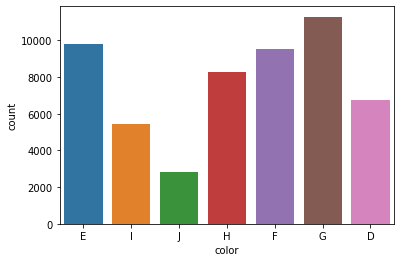

In [ ]:
# Proporciones de la clase color
sns.countplot(data = base, x = 'color')

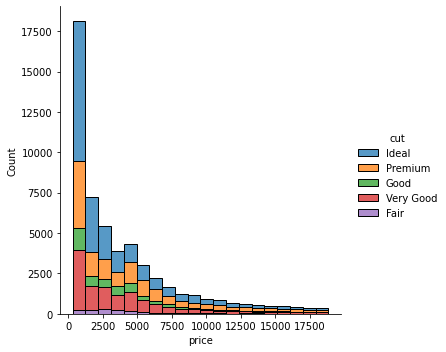

In [ ]:
# Distribucion del precio agrupado por cut
sns.displot(base, x = 'price' , bins = 20, kde = False, kind = 'hist', 
            hue = 'cut', multiple = 'stack')

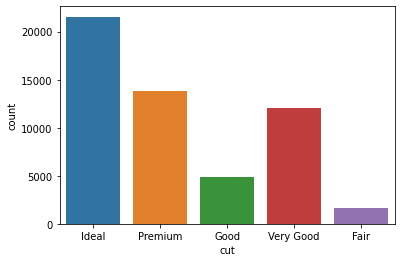

In [ ]:
# Proporciones de la clase cut
sns.countplot(data = base, x = 'cut')

# Preparacion de los datos

In [ ]:
# Respaldar base original
datos = base.copy()

In [ ]:
# Etiquetar variables categoricas
from sklearn.preprocessing import LabelEncoder

In [ ]:
for cat in  var_cat:
  datos[cat] = LabelEncoder().fit_transform(datos[cat])

In [ ]:
for cat in var_cat:
  print('Codificacion de la variable categorica: ', cat)
  print(base[cat].unique(), '->' ,datos[cat].unique(), '\n')

Codificacion de la variable categorica:  cut
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair'] -> [2 3 1 4 0] 

Codificacion de la variable categorica:  color
['E' 'I' 'J' 'H' 'F' 'G' 'D'] -> [1 5 6 4 2 3 0] 

Codificacion de la variable categorica:  clarity
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF'] -> [3 2 4 5 7 6 0 1] 



In [ ]:
# Estandarizar variables
from sklearn.preprocessing import StandardScaler

In [ ]:
x = datos.drop(['price'], axis = 1)
y = pd.DataFrame(datos.price)

In [ ]:
x.head(5)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75


In [ ]:
y.head(5)

,price
0,326
1,326
2,327
3,334
4,335


In [ ]:
# Estandarizar x
x_stand = StandardScaler().fit_transform(x)


In [ ]:
pd.DataFrame(x_stand, columns = x.columns)[:5]

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.198168,-0.538099,-0.937163,-0.484264,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129
1,-1.240361,0.434949,-0.937163,-1.064117,-1.360738,1.585529,-1.641325,-1.658774,-1.741175
2,-1.198168,-1.511147,-0.937163,0.095589,-3.385019,3.375663,-1.498691,-1.457395,-1.741175
3,-1.071587,0.434949,1.414272,0.675442,0.454133,0.242928,-1.364971,-1.317305,-1.287720
4,-1.029394,-1.511147,2.002131,-0.484264,1.082358,0.242928,-1.240167,-1.212238,-1.117674


In [ ]:
# Crear conjuntos de entrenamiento y validacion
from sklearn.model_selection import train_test_split

In [ ]:
x_stand_train, x_stand_test, y_train, y_test = train_test_split(x_stand, y, 
                                                                test_size = 0.20,
                                                                random_state = 369)

In [ ]:
print('Proporcion de los Conjuntos: \n')
print('x entrenamiento: ', round(x_stand_train.shape[0]/datos.shape[0]*100,2), '%')
print('x prueba:  \t',round(x_stand_test.shape[0]/datos.shape[0]*100,2), '%\n')
print('y entrenamiento: ',round(y_train.shape[0]/datos.shape[0]*100,2), '%')
print('y prueba:  \t', round(y_test.shape[0]/datos.shape[0]*100,2), '%')

Proporcion de los Conjuntos: 

x entrenamiento:  80.0 %
x prueba:  	 20.0 %

y entrenamiento:  80.0 %
y prueba:  	 20.0 %


# Ejemplo de Regresion

## Red Neuronal

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
RN = MLPRegressor(hidden_layer_sizes = (300,300), activation = 'identity', 
                  max_iter = 1000)
RN.fit(x_stand_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='identity', hidden_layer_sizes=(300, 300),
             max_iter=1000)

In [ ]:
RN_pred_train = RN.predict(x_stand_train)
RN_pred_test = RN.predict(x_stand_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
print('El R2 para datos de entrenamiento es = ', 
      round(r2_score(y_train, RN_pred_train)*100,2), '%')
print('El ECM para datos de entrenamiento es = ', 
      round(mean_squared_error(y_train, RN_pred_train),2), '')
print('El RECM para datos de entrenamiento es = ', 
      round(np.sqrt(mean_squared_error(y_train, RN_pred_train)),2), '\n')

print('El R2 para datos de prueba es = ', 
      round(r2_score(y_test, RN_pred_test)*100,2), '%')
print('El ECM para datos de prueba es = ', 
      round(mean_squared_error(y_test, RN_pred_test),2))
print('El RECM para datos de prueba es = ', 
      round(np.sqrt(mean_squared_error(y_test, RN_pred_test)),2))

El R2 para datos de entrenamiento es =  88.35 %
El ECM para datos de entrenamiento es =  1859631.72 
El RECM para datos de entrenamiento es =  1363.68 

El R2 para datos de prueba es =  88.97 %
El ECM para datos de prueba es =  1732967.19
El RECM para datos de prueba es =  1316.42


## SVR - Support vector regression

In [ ]:
from sklearn.svm import SVR

In [ ]:
SVR = SVR(kernel = 'linear')
SVR.fit(x_stand_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
SVR_pred_train = SVR.predict(x_stand_train)
SVR_pred_test = SVR.predict(x_stand_test)

In [ ]:
print('El R2 para datos de entrenamiento es = ', 
      round(r2_score(y_train, SVR_pred_train)*100,2), '%')
print('El ECM para datos de entrenamiento es = ', 
      round(mean_squared_error(y_train, SVR_pred_train),2), '')
print('El RECM para datos de entrenamiento es = ', 
      round(np.sqrt(mean_squared_error(y_train, SVR_pred_train)),2), '\n')

print('El R2 para datos de prueba es = ', 
      round(r2_score(y_test, SVR_pred_test)*100,2), '%')
print('El ECM para datos de prueba es = ', 
      round(mean_squared_error(y_test, SVR_pred_test),2))
print('El RECM para datos de prueba es = ', 
      round(np.sqrt(mean_squared_error(y_test, SVR_pred_test)),2))

El R2 para datos de entrenamiento es =  84.16 %
El ECM para datos de entrenamiento es =  2529041.23 
El RECM para datos de entrenamiento es =  1590.3 

El R2 para datos de prueba es =  84.75 %
El ECM para datos de prueba es =  2396598.46
El RECM para datos de prueba es =  1548.1


## Arbol de decision para regresion


In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz, export_text
from sklearn.model_selection import GridSearchCV

In [ ]:
# Nuevas muestras sin estandarizar - No es necesario
x_train_rf, x_test_rf , y_train_rf, y_test_rf = train_test_split(x, y, 
                                                                test_size = 0.20,
                                                                random_state = 369)
print('Proporcion de los Conjuntos: \n')
print('x entrenamiento: ', round(x_train_rf.shape[0]/datos.shape[0]*100,2), '%')
print('x prueba:  \t',round(x_test_rf.shape[0]/datos.shape[0]*100,2), '%\n')
print('y entrenamiento: ',round(y_train_rf.shape[0]/datos.shape[0]*100,2), '%')
print('y prueba:  \t', round(y_test_rf.shape[0]/datos.shape[0]*100,2), '%')

Proporcion de los Conjuntos: 

x entrenamiento:  80.0 %
x prueba:  	 20.0 %

y entrenamiento:  80.0 %
y prueba:  	 20.0 %


In [ ]:
# Creacion  modelo inicial - Profundidad 3 niveles
DT = DecisionTreeRegressor(
    max_depth = 3,
    random_state = 369
)

DT.fit(x_train_rf, y_train_rf)

DecisionTreeRegressor(max_depth=3, random_state=369)

Profundidad del arbol: 3
Numero de nodos terminales: 8


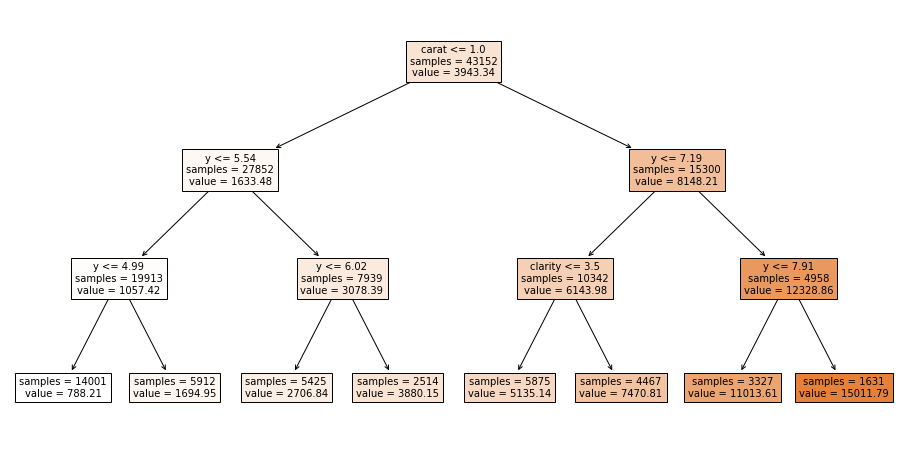

In [ ]:
# Grafico
fig, ax = plt.subplots(figsize = (16,8))
print(f'Profundidad del arbol: {DT.get_depth()}')
print(f'Numero de nodos terminales: {DT.get_n_leaves()}')

plot = plot_tree(
    decision_tree = DT,
    feature_names = x.columns,
    class_names = y.columns,
    filled = True,
    impurity = False,
    fontsize = 10,
    precision = 2,
    ax = ax
)

In [ ]:
# Diagrama
texto_modelo = export_text(
    decision_tree = DT,
    feature_names = list(x.columns)
)

print(texto_modelo)

|--- carat <= 1.00
|   |--- y <= 5.54
|   |   |--- y <= 4.99
|   |   |   |--- value: [788.21]
|   |   |--- y >  4.99
|   |   |   |--- value: [1694.95]
|   |--- y >  5.54
|   |   |--- y <= 6.02
|   |   |   |--- value: [2706.84]
|   |   |--- y >  6.02
|   |   |   |--- value: [3880.15]
|--- carat >  1.00
|   |--- y <= 7.19
|   |   |--- clarity <= 3.50
|   |   |   |--- value: [5135.14]
|   |   |--- clarity >  3.50
|   |   |   |--- value: [7470.81]
|   |--- y >  7.19
|   |   |--- y <= 7.91
|   |   |   |--- value: [11013.61]
|   |   |--- y >  7.91
|   |   |   |--- value: [15011.79]



In [ ]:
# Verificar importancia de predictores
importancia_predictores = pd.DataFrame(
    {'Predictor' : x.columns,
     'Importancia' : DT.feature_importances_}
)

print('Importancia de los predictores del modelo: ')
print('\n ---------------------------------------')
importancia_predictores.sort_values('Importancia', ascending = False)

Importancia de los predictores del modelo: 

 ---------------------------------------


,Predictor,Importancia
0,carat,0.689771
7,y,0.287446
3,clarity,0.022783
1,cut,0.000000
2,color,0.000000
4,depth,0.000000
5,table,0.000000
6,x,0.000000
8,z,0.000000


In [ ]:
# Poda del Arbol (Cost complexity prunning)
# Reduccion varianza del modelo

#Valores de alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0,80,20)}

# Busqueda por validacion cruzada
grid = GridSearchCV(
    #El arbol se crece a lo maximo posible para luego aplicar pruning
    estimator = DecisionTreeRegressor(
        max_depth = None,
        min_samples_split = 5000,
        min_samples_leaf = 2000,
        random_state = 123
    ),
    param_grid = param_grid,
    cv = 10,
    refit = True,
    return_train_score = True
)

grid.fit(x_train_rf, y_train_rf)

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(min_samples_leaf=2000,
                                             min_samples_split=5000,
                                             random_state=123),
             param_grid={'ccp_alpha': array([ 0.        ,  4.21052632,  8.42105263, 12.63157895, 16.84210526,
       21.05263158, 25.26315789, 29.47368421, 33.68421053, 37.89473684,
       42.10526316, 46.31578947, 50.52631579, 54.73684211, 58.94736842,
       63.15789474, 67.36842105, 71.57894737, 75.78947368, 80.        ])},
             return_train_score=True)

Text(0.5, 1.0, 'Error de validacion cruzada vs hiperparametro ccp_alpha')

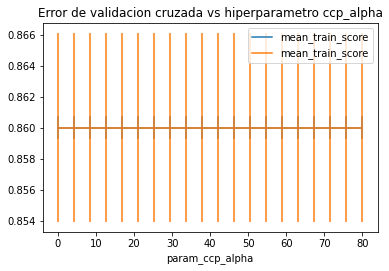

In [ ]:
fig, ax = plt.subplots(figsize = (6,3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x= 'param_ccp_alpha', y = 'mean_train_score' , yerr = 'std_train_score',ax = ax)
scores.plot(x= 'param_ccp_alpha', y = 'mean_train_score' , yerr = 'std_test_score',ax = ax)
ax.set_title('Error de validacion cruzada vs hiperparametro ccp_alpha')

In [ ]:
# Mejor valor ccp_alpha encontrado
grid.best_params_

{'ccp_alpha': 0.0}

Una vez identificado el valor óptimo de ccp_alpha, se reentrena el árbol indicando este valor en sus argumentos. Si en el GridSearchCV() se indica refit=True, este reentrenamiento se hace automáticamente y el modelo resultante se encuentra almacenado en .best_estimator_.

Profundidad del arbol: 6
Numero de nodos terminales: 13


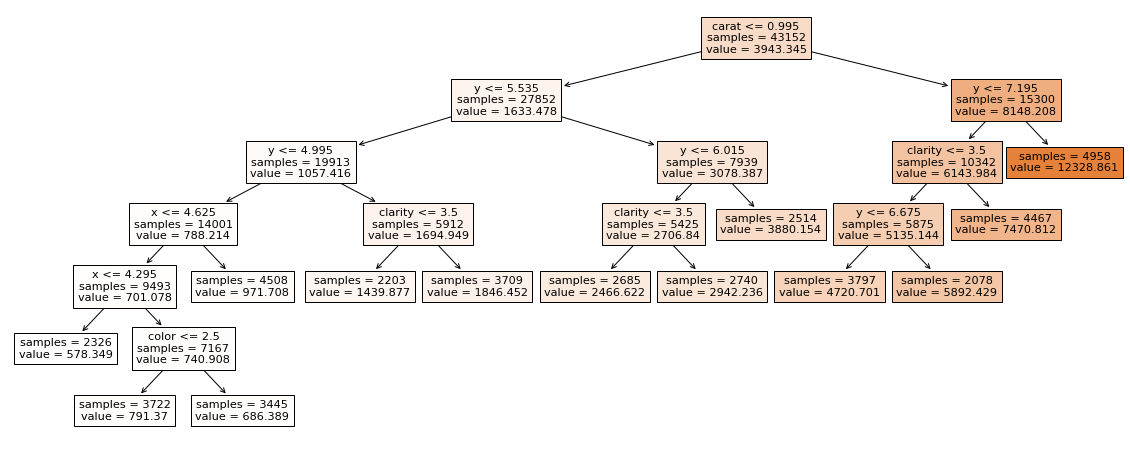

In [ ]:
# Rentrenar modelo con nuevo valor ccp_alpha optimo
DT_final = grid.best_estimator_
print(f'Profundidad del arbol: {DT_final.get_depth()}')
print(f'Numero de nodos terminales: {DT_final.get_n_leaves()}')

fig , ax = plt.subplots(figsize = (20,8))
plot = plot_tree(
    decision_tree = DT_final,
    feature_names = x.columns,
    class_names = y.columns,
    filled = True,
    impurity = False,
    ax = ax
)

In [ ]:
importancia_predictores = pd.DataFrame(
    {'Predictor' : x.columns,
     'Importancia' : DT_final.feature_importances_}
)

print('Importancia de los predictores del modelo: ')
print('\n ---------------------------------------')
importancia_predictores.sort_values('Importancia', ascending = False)

Importancia de los predictores del modelo: 

 ---------------------------------------


,Predictor,Importancia
0,carat,0.707023
7,y,0.268232
3,clarity,0.024255
6,x,0.000456
2,color,0.000033
1,cut,0.000000
4,depth,0.000000
5,table,0.000000
8,z,0.000000


In [ ]:
DT_pred_rf_train = DT.predict(x_train_rf)
DT_pred_rf_test = DT.predict(x_test_rf)

In [ ]:
DT_final_pred_rf_train = DT_final.predict(x_train_rf)
DT_final_pred_rf_test = DT_final.predict(x_test_rf)

In [ ]:
# Prediccion y evaluacion del modelo

print('Modelo arbitario de 3 niveles y 8 nodos terminales: \n')
print('El R2 para datos de entrenamiento es = ', 
      round(r2_score(y_train_rf, DT_pred_rf_train)*100,2), '%')
print('El ECM para datos de entrenamiento es = ', 
      round(mean_squared_error(y_train_rf, DT_pred_rf_train),2), '')
print('El RECM para datos de entrenamiento es = ', 
      round(np.sqrt(mean_squared_error(y_train_rf, DT_pred_rf_train)),2), '\n')

print('El R2 para datos de prueba es = ', 
      round(r2_score(y_test_rf, DT_pred_rf_test)*100,2), '%')
print('El ECM para datos de prueba es = ', 
      round(mean_squared_error(y_test_rf, DT_pred_rf_test),2))
print('El RECM para datos de prueba es = ', 
      round(np.sqrt(mean_squared_error(y_test_rf, DT_pred_rf_test)),2))

Modelo arbitario de 3 niveles y 8 nodos terminales: 

El R2 para datos de entrenamiento es =  88.2 %
El ECM para datos de entrenamiento es =  1884283.72 
El RECM para datos de entrenamiento es =  1372.69 

El R2 para datos de prueba es =  88.22 %
El ECM para datos de prueba es =  1850973.54
El RECM para datos de prueba es =  1360.5


In [ ]:
print('Modelo arbitario de 6 niveles y 13 nodos terminales: \n')
print('El R2 para datos de entrenamiento es = ', 
      round(r2_score(y_train_rf, DT_final_pred_rf_train)*100,2), '%')
print('El ECM para datos de entrenamiento es = ', 
      round(mean_squared_error(y_train_rf, DT_final_pred_rf_train),2), '')
print('El RECM para datos de entrenamiento es = ', 
      round(np.sqrt(mean_squared_error(y_train_rf, DT_final_pred_rf_train)),2), '\n')

print('El R2 para datos de prueba es = ', 
      round(r2_score(y_test_rf, DT_pred_rf_test)*100,2), '%')
print('El ECM para datos de prueba es = ', 
      round(mean_squared_error(y_test_rf, DT_final_pred_rf_test),2))
print('El RECM para datos de prueba es = ', 
      round(np.sqrt(mean_squared_error(y_test_rf, DT_final_pred_rf_test)),2))

Modelo arbitario de 6 niveles y 13 nodos terminales: 

El R2 para datos de entrenamiento es =  86.05 %
El ECM para datos de entrenamiento es =  2227867.74 
El RECM para datos de entrenamiento es =  1492.6 

El R2 para datos de prueba es =  88.22 %
El ECM para datos de prueba es =  2195543.28
El RECM para datos de prueba es =  1481.74


# Ejemplo de Clasificacion

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
base_c = base.copy()

In [ ]:
# Etiquetar Variables Categoricas
for i in var_cat:
  base_c[i] = LabelEncoder().fit_transform(base_c[i])
base_c

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
for cat in var_cat:
  print('Codificacion de la variable categorica: ', cat)
  print(base[cat].unique(), '->' ,base_c[cat].unique(), '\n')

Codificacion de la variable categorica:  cut
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair'] -> [2 3 1 4 0] 

Codificacion de la variable categorica:  color
['E' 'I' 'J' 'H' 'F' 'G' 'D'] -> [1 5 6 4 2 3 0] 

Codificacion de la variable categorica:  clarity
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF'] -> [3 2 4 5 7 6 0 1] 



In [ ]:
# Separa conjuntos en variables independientes y dependientes
x2 = base_c.drop(['cut'], axis = 1)
x2.head(5)

,carat,color,clarity,depth,table,price,x,y,z
0,0.23,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,6,3,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
y2 = base_c[['cut']]
y2.head(5)

,cut
0,2
1,3
2,1
3,3
4,1


In [ ]:
# Estandarizar variables independientes
from sklearn.preprocessing import StandardScaler

x2_sc = pd.DataFrame(StandardScaler().fit_transform(x2), columns = x2.columns)
x2_sc.head(5)

,carat,color,clarity,depth,table,price,x,y,z
0,-1.198168,-0.937163,-0.484264,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,-1.240361,-0.937163,-1.064117,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175
2,-1.198168,-0.937163,0.095589,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175
3,-1.071587,1.414272,0.675442,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720
4,-1.029394,2.002131,-0.484264,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674


In [ ]:
# Crear conjunto de entrenamiento y validacion
from sklearn.model_selection import train_test_split

In [ ]:
x_train_c, x_test_c , y_train_c, y_test_c = train_test_split(x2_sc, y2, 
                                                                test_size = 0.20,
                                                                random_state = 369)
print('Proporcion de los Conjuntos: \n')
print('x entrenamiento: ', round(x_train_c.shape[0]/datos.shape[0]*100,2), '%')
print('x prueba:  \t',round(x_test_c.shape[0]/datos.shape[0]*100,2), '%\n')
print('y entrenamiento: ',round(y_train_c.shape[0]/datos.shape[0]*100,2), '%')
print('y prueba:  \t', round(y_test_c.shape[0]/datos.shape[0]*100,2), '%')

Proporcion de los Conjuntos: 

x entrenamiento:  80.0 %
x prueba:  	 20.0 %

y entrenamiento:  80.0 %
y prueba:  	 20.0 %


In [ ]:
# Aplicar modelo de Redes Neuronales para clasificacion
from sklearn.neural_network import MLPClassifier

In [ ]:
RNC = MLPClassifier(hidden_layer_sizes = (150,150),activation='relu', max_iter = 500)
RNC.fit(x_train_c, y_train_c)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(150, 150), max_iter=500)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# Metricas de validacion
print('Datos de entrenamiento: \n')
pred_x_train_c = RNC.predict(x_train_c)
print('Matriz de confusion: ----------------------------------\n ',
      confusion_matrix(y_train_c, pred_x_train_c),'\n')
print('Reporte de clasificacion: ---------------------------------\n',
      classification_report(y_train_c, pred_x_train_c))
print('Precicion del Modelo: ------------------------------\n',
      round(accuracy_score(y_train_c, pred_x_train_c)*100,2),'%')

Datos de entrenamiento: 

Matriz de confusion: ----------------------------------
  [[ 1259    12     4     9     6]
 [  122  3009    53    24   729]
 [    5    11 16232   315   729]
 [    4     5  1003  8982   985]
 [    4   172  1640   451  7387]] 

Reporte de clasificacion: ---------------------------------
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      1290
           1       0.94      0.76      0.84      3937
           2       0.86      0.94      0.90     17292
           3       0.92      0.82      0.87     10979
           4       0.75      0.77      0.76      9654

    accuracy                           0.85     43152
   macro avg       0.87      0.85      0.86     43152
weighted avg       0.86      0.85      0.85     43152

Precicion del Modelo: ------------------------------
 85.44 %


In [ ]:
# Metricas de validacion
print('Datos de test: \n')
pred_x_test_c = RNC.predict(x_test_c)
print('Matriz de confusion: ----------------------------------\n ',
      confusion_matrix(y_test_c, pred_x_test_c),'\n')
print('Reporte de clasificacion: ---------------------------------\n',
      classification_report(y_test_c, pred_x_test_c))
print('Precicion del Modelo: ------------------------------\n',
      round(accuracy_score(y_test_c, pred_x_test_c)*100,2),'%')

Datos de test: 

Matriz de confusion: ----------------------------------
  [[ 283   21    2    7    7]
 [  60  607   15   12  275]
 [   4    8 3823  155  269]
 [   7    9  315 2126  355]
 [   5  130  548  156 1589]] 

Reporte de clasificacion: ---------------------------------
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       320
           1       0.78      0.63      0.70       969
           2       0.81      0.90      0.85      4259
           3       0.87      0.76      0.81      2812
           4       0.64      0.65      0.65      2428

    accuracy                           0.78     10788
   macro avg       0.78      0.76      0.77     10788
weighted avg       0.78      0.78      0.78     10788

Precicion del Modelo: ------------------------------
 78.12 %
